# Linear Regression.
Linear Regression is a machine learning algorithm based on supervised learning.  It performs a regression task.  Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used. 
There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand. The independent variables can be called exogenous variables, predictor variables, or regressors.

Source: https://www.geeksforgeeks.org/ml-linear-regression/

The most common type of linear regression that we have encounterd in our life is $y = m*x + c$. This equation is used to predict the value of y at a value x given the slope of the line is m and the intercept or the point where the line intercepts the y axis is c

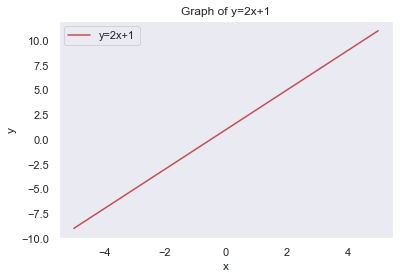

In the above example the slope on the line(m) is 2 and the intercept(c) is 1. Using this we can predict the value of the y for any value of x for the given equation.

In [1]:
# importing necessary lib to perform Linear Regression
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression 
sns.set()

In [2]:
# creating a dataset of 1 feature(s) of 100 different samples
X, y = make_regression(n_samples=100, 
                       n_features=1,
                       n_informative=1,
                       noise= 20,
                       random_state=0
)
print(X[:10])   #printing the first 10 features                       

[[-0.35955316]
 [ 0.97663904]
 [ 0.40234164]
 [-0.81314628]
 [-0.88778575]
 [ 0.44386323]
 [-0.97727788]
 [ 0.42833187]
 [ 0.20827498]
 [-0.31155253]]


X is matrix of size m x n. Each Row(m) of the X is a different training example and column(n) represents the number of features in the training data. In our case the size of the training data will be (100, 1)

In [3]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


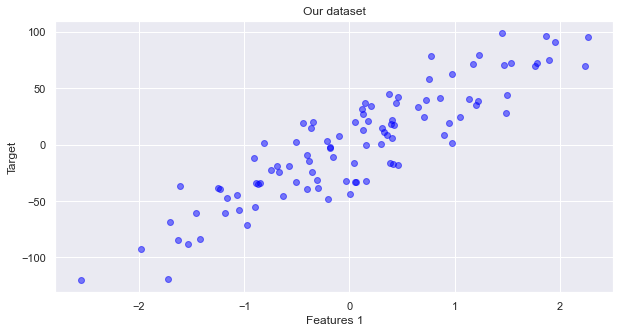

In [4]:
# Plotting the values on a graph 
def Figure(X,y):
    # create figure
    fig = plt.figure(figsize=(10, 5))
    # add subplot (rows, cols, number)
    ax = fig.add_subplot(1, 1, 1, xlabel='Features 1', ylabel='Target')
    # plot data on new axis
    ax.scatter(X,y, color='blue', alpha=0.5)
    ax.set_title('Our dataset')
    # display plot
    plt.show()

Figure(X,y)

# Bias Trick
The bias trick is used to reduce the calculations required. Doing a matrix multiplication and then adding a bias vector (left) is equivalent to adding a bias dimension with a constant of 1 to all input vectors and extending the weight matrix by 1 column – a bias column (right). Thus, if we preprocess our data by appending ones to all vectors we only have to learn a single matrix of weights instead of two matrices that hold the weights and the biases.

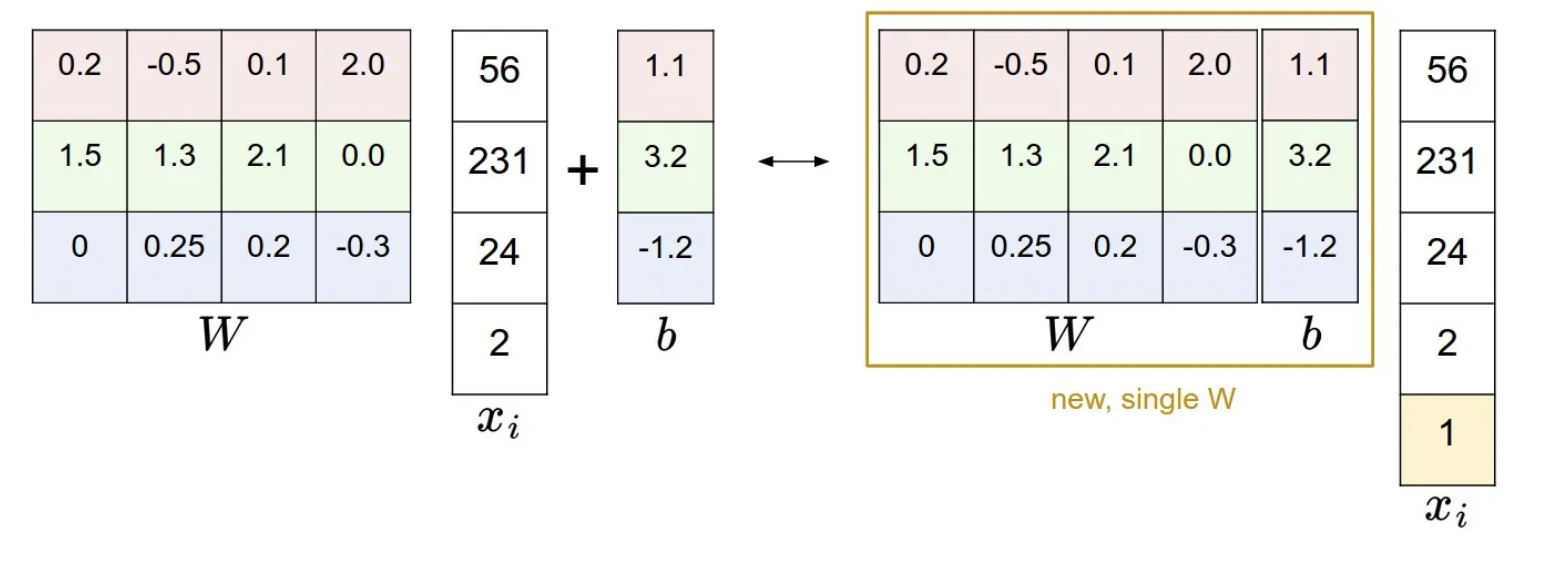

Ref: http://cs231n.github.io/linear-classify/

In [5]:
N = X.shape[0]
X_new = np.concatenate([np.ones((N, 1)), X], axis=1)
# Going forward this will be the matrix used for calculation

The Linear Regression Line for a single variable can be written as $y = \theta_0 + \theta_1 x_1$ and for problems with multiple variables the equation changes to $y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 ... + \theta_n x_n$ where $x_n$ is the number of features present in the model. To simplify the notation of the equation we can re write the equation in terms of the vector notation on the variables i.e vector notation $\vec \theta = [\theta_1, \theta_2, ...., \theta_n]$ 
$\vec x = [x_1, x_2, x_3, ...., x_n]$ which can be simplified to $h_{\theta}(x_i)$= $\theta^T \cdot \vec x+ b$= $\theta_0 + \theta_1 x_1 + \theta_2 x_2 ... + \theta_i$.

$\theta^T x$ is used to calculate the hypothesis for a single training example when X is a vector. In practice there is a very rare chance that your training data will only consist of a single training example. In case of multiple training examples, the training vector X will be a matrix of size m x n where is the number of training examples and n is the number of features.

$\theta$ has to be a n x 1 vector then when you do Matrix-Vector Multiplication $X \theta$ you will obtain an m x 1 vector with all your h(x)'s training examples in your training set (X matrix). Matrix multiplication will create the vector h(x) row by row making the corresponding math and this will be equal to the h(x) definition at each training example.

## Ordinary Least Square



OLS is a meathod of finding the co-efficients of the linear equation. The equation of the OLS is $\beta = (X^TX)^{-1}X^TY$. This equation is also know as the Normal Equation. 

In [6]:
def Hypothesis(X, y):
    beta = inv(X.T.dot(X)).dot(X.T).dot(y) 
    return X.dot(beta), beta

h_x, beta= Hypothesis(X_new, y)
print(beta)

[-1.62836365 42.85335573]


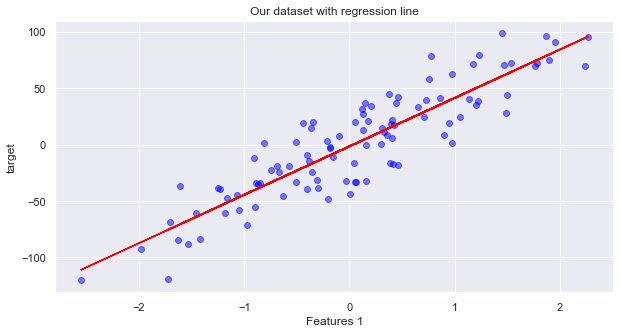

In [7]:
def Prediction(X, y):
    # create figure
    fig = plt.figure(figsize=(10, 5))
    # add subplot (rows, cols, number)
    ax = fig.add_subplot(1, 1, 1, xlabel='Features 1', ylabel='target')
    # plot data on new axis
    ax.scatter(X,y, color='blue', alpha=0.5)
    # plot regression line
    ax.plot(X, h_x, color='red')
    ax.set_title('Our dataset with regression line')
    # display plot
    plt.show()

Prediction(X, y)

Cost function is an important parameter that determines how well a machine learning model performs for a given dataset. It calculates the difference between the expected value and predicted value and represents it as a single real number.

In [8]:
def CostFunction(X, y, beta):
    return  (X.dot(beta) -y).dot(X.dot(beta) -y) /(2*X.shape[0])

cost_func = CostFunction(X_new, y, beta)
print('Cost: %.02f ' % (cost_func))

Cost: 228.34 


In [9]:
def Mean_Square_Error(X, y, beta):
    return (X.dot(beta) - y).dot(X.dot(beta) - y)/ X.shape[0]

mse = Mean_Square_Error(X_new, y, beta)
print('MSE: %.02f RMSE: %.02f' % (mse, np.sqrt(mse)))

MSE: 456.69 RMSE: 21.37


In [10]:
def AbsoluteError(X, y, beta):
    return np.sum(abs(X.dot(beta) - y)) / X.shape[0]

mae = AbsoluteError(X_new, y, beta)
print('MAE: %.02f' % (mae))

MAE: 17.55


In [11]:
def Gradient(X, y, beta):
    return (y - X.dot(beta)).dot(X) /X.shape[0]


print(norm(Gradient(X_new, y, beta)))

4.120214406374979e-15


In [18]:
def BGD(X, y, lr):
    N, D = X.shape
    theta = np.random.rand(D)

    losses  = [Mean_Square_Error(X, y, theta)]
    betas = [theta.copy()]

    cost = CostFunction(X, y, theta)

    itr = 1
    while True:
        y_pred = X.dot(theta)
        d_theta = Gradient(X, y, theta)
        theta_temp = theta + lr*d_theta
        
        loss = CostFunction(X, y, theta)
        
        losses.append(loss)
        betas.append(theta.copy())

        # Stopping Condition
        if np.sum(abs(theta_temp - theta)) < 1e-5:
            break
        
        if (itr % 10 == 0):
            print ("Iteration: %d - loss: %.4f "%(itr, loss))
        
        itr += 1
        print(theta_temp)
        theta = theta_temp

    print("Converged at Iteration: %d - loss: %.4f "%(itr, loss))
    return y_pred, np.array(losses), np.array(betas)
h_x , losses_BGD, betas = BGD(X_new, y, 1e-1)
print(betas[-1])

[0.76508508 4.83383558]
[0.75312741 8.69524448]
[ 0.71927119 12.16309147]
[ 0.66806009 15.27762738]
[ 0.60334267 18.07497265]
[ 0.52836663 20.58754259]
[ 0.44586101 22.84442866]
[ 0.35810797 24.8717404 ]
[ 0.26700528 26.69291208]
Iteration: 10 - loss: 361.4210 
[ 0.17412079 28.32897772]
[ 0.08073977 29.79881777]
[-1.20939720e-02  3.11193803e+01]
[-0.10354236 32.3058794 ]
[-0.19294213 33.3719733 ]
[-0.27977801 34.32992388]
[-0.36365962 35.19073998]
[-0.44430144 35.96430586]
[-0.52150562 36.65949646]
[-0.59514718 37.28428081]
Iteration: 20 - loss: 244.3408 
[-0.6651613  37.84581486]
[-0.73153243 38.35052467]
[-0.79428501 38.80418113]
[-0.85347556 39.21196699]
[-0.90918595 39.57853702]
[-0.96151768 39.90807197]
[-1.01058712 40.20432699]
[-1.05652146 40.47067514]
[-1.09945534 40.71014638]
[-1.13952806 40.92546262]
Iteration: 30 - loss: 230.3005 
[-1.17688127 41.11906911]
[-1.21165709 41.29316269]
[-1.24399654 41.4497171 ]
[-1.27403837 41.5905057 ]
[-1.30191804 41.71712194]
[-1.32776701 41.

In [13]:
def SGD(X, y, lr):
    N, D = X.shape
    theta = np.random.rand(D)

    losses  = [Mean_Square_Error(X, y, theta)]
    betas = [theta.copy()]

    cost = CostFunction(X, y, theta)

    for i in range(N):
        y_pred = X.dot(theta)
        d_theta = Gradient(X, y, theta)
        theta_temp = theta + lr*d_theta
        
        loss = CostFunction(X, y, theta)
        
        losses.append(loss)
        betas.append(theta.copy())

        # Stopping Condition
        if np.sum(abs(theta_temp - theta)) < 1e-5:
            break
        
        if (i % 10 == 0):
            print ("Iteration: %d - loss: %.4f "%(i, loss))
        
        theta = theta_temp

    print("Converged at Iteration: %d - loss: %.4f "%(i, loss))    
    return y_pred, np.array(losses), np.array(betas)
h_x , losses_SGD, betas = SGD(X_new, y, 1e-1)
print(betas[-1])

Iteration: 0 - loss: 1137.5471 
Iteration: 10 - loss: 335.8480 
Iteration: 20 - loss: 241.2867 
Iteration: 30 - loss: 229.9292 
Iteration: 40 - loss: 228.5406 
Iteration: 50 - loss: 228.3680 
Iteration: 60 - loss: 228.3462 
Iteration: 70 - loss: 228.3434 
Iteration: 80 - loss: 228.3430 
Iteration: 90 - loss: 228.3430 
Converged at Iteration: 99 - loss: 228.3430 
[-1.62748699 42.85206229]


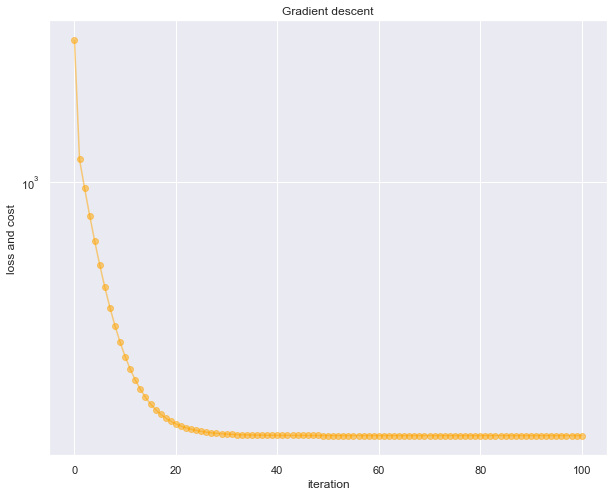

In [14]:
# create figure
fig = plt.figure(figsize=(10, 8))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss and cost')
# plot data on new axis
#ax.plot(losses_BGD , color='blue', marker='x', alpha=0.5)
ax.plot(losses_SGD, color='orange', marker='o', alpha=0.5)

ax.set_title('Gradient descent')
ax.set_yscale('log')
# display plot
plt.show()

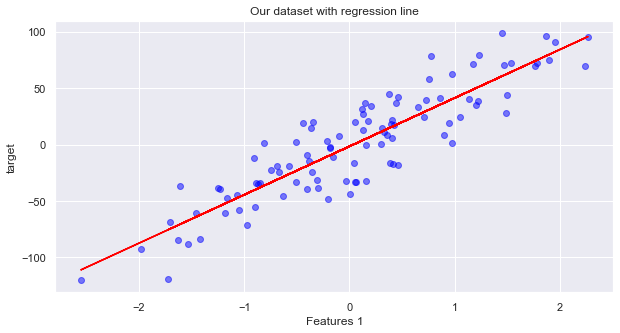

In [15]:
Prediction(X, y)

Iteration: 10 - loss: 1104.4301 
Iteration: 20 - loss: 1052.5701 
Iteration: 30 - loss: 1003.7902 
Iteration: 40 - loss: 957.9068 
Iteration: 50 - loss: 914.7473 
Iteration: 60 - loss: 874.1497 
Iteration: 70 - loss: 835.9612 
Iteration: 80 - loss: 800.0385 
Iteration: 90 - loss: 766.2467 
Iteration: 100 - loss: 734.4589 
Iteration: 110 - loss: 704.5560 
Iteration: 120 - loss: 676.4258 
Iteration: 130 - loss: 649.9628 
Iteration: 140 - loss: 625.0679 
Iteration: 150 - loss: 601.6479 
Iteration: 160 - loss: 579.6152 
Iteration: 170 - loss: 558.8872 
Iteration: 180 - loss: 539.3865 
Iteration: 190 - loss: 521.0401 
Iteration: 200 - loss: 503.7795 
Iteration: 210 - loss: 487.5403 
Iteration: 220 - loss: 472.2617 
Iteration: 230 - loss: 457.8867 
Iteration: 240 - loss: 444.3618 
Iteration: 250 - loss: 431.6365 
Iteration: 260 - loss: 419.6634 
Iteration: 270 - loss: 408.3978 
Iteration: 280 - loss: 397.7979 
Iteration: 290 - loss: 387.8241 
Iteration: 300 - loss: 378.4393 
Iteration: 310 -

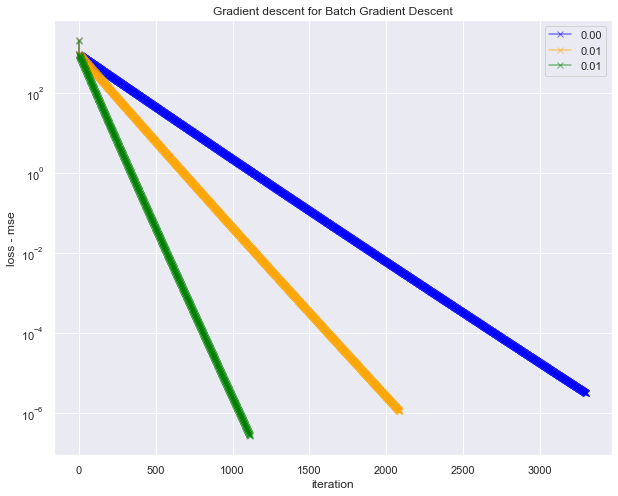

In [16]:
from numpy.linalg import eigvals
eigens = eigvals(X_new.T.dot(X_new) / X_new.shape[0])

lr = [0.003, 0.005, 0.01]
h_x , losses_1, betas = BGD(X_new, y, lr[0])
h_x , losses_2, betas = BGD(X_new, y, lr[1])
h_x , losses_3, betas = BGD(X_new, y, lr[2])

print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[0]), max(losses_1 - cost_func), min(losses_1 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[1]), max(losses_2 - cost_func), min(losses_2 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[2]), max(losses_3 - cost_func), min(losses_3 - cost_func))
# create figure
fig = plt.figure(figsize=(10, 8))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss - mse')
# plot data on new axis
ax.plot(losses_1 - cost_func, color='blue', marker='x', alpha=0.5, label='%.02f' % lr[0])
ax.plot(losses_2 - cost_func, color='orange', marker='x', alpha=0.5, label='%.02f' % lr[1])
ax.plot(losses_3 - cost_func, color='green', marker='x', alpha=0.5, label='%.02f' % lr[2])


ax.set_title('Gradient descent for Batch Gradient Descent')
ax.set_yscale('log')
plt.legend()
# display plot
plt.show()

Iteration: 0 - loss: 1152.2039 
Iteration: 10 - loss: 981.5898 
Iteration: 20 - loss: 842.5752 
Iteration: 30 - loss: 729.2908 
Iteration: 40 - loss: 636.9607 
Iteration: 50 - loss: 561.6978 
Iteration: 60 - loss: 500.3382 
Iteration: 70 - loss: 450.3061 
Iteration: 80 - loss: 409.5043 
Iteration: 90 - loss: 376.2250 
Converged at Iteration: 99 - loss: 351.5500 
Iteration: 0 - loss: 1147.3812 
Iteration: 10 - loss: 337.0691 
Iteration: 20 - loss: 241.4407 
Iteration: 30 - loss: 229.9489 
Iteration: 40 - loss: 228.5432 
Iteration: 50 - loss: 228.3683 
Iteration: 60 - loss: 228.3462 
Iteration: 70 - loss: 228.3434 
Iteration: 80 - loss: 228.3430 
Iteration: 90 - loss: 228.3430 
Converged at Iteration: 99 - loss: 228.3430 
Iteration: 0 - loss: 1150.0349 
Converged at Iteration: 6 - loss: 228.3430 
Highest and lowest of loss - cost fucntion at lr 0.01 is 2076.064748853942 123.20706991158431
Highest and lowest of loss - cost fucntion at lr 0.1 is 2066.4193852129524 1.1862992437272624e-06
Hi

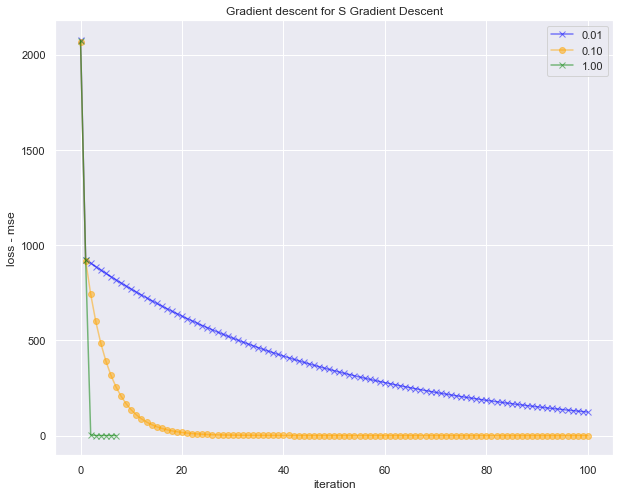

In [17]:
from numpy.linalg import eigvals
eigens = eigvals(X_new.T.dot(X_new) / X_new.shape[0])

lr = [1e-2, 1e-1, 1]
h_x , losses_1, betas = SGD(X_new, y, lr[0])
h_x , losses_2, betas = SGD(X_new, y, lr[1])
h_x , losses_3, betas = SGD(X_new, y, lr[2])

print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[0]), max(losses_1 - cost_func), min(losses_1 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[1]), max(losses_2 - cost_func), min(losses_2 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[2]), max(losses_3 - cost_func), min(losses_3 - cost_func))
# create figure
fig = plt.figure(figsize=(10, 8))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss - mse')
# plot data on new axis
ax.plot(losses_1 - cost_func, color='blue', marker='x', alpha=0.5, label='%.02f' % lr[0])
ax.plot(losses_2 - cost_func, color='orange', marker='o', alpha=0.5, label='%.02f' % lr[1])
ax.plot(losses_3 - cost_func, color='green', marker='x', alpha=0.5, label='%.02f' % lr[2])


ax.set_title('Gradient descent for S Gradient Descent')
ax.set_yscale('log')
plt.legend()
# display plot
plt.show()